## <b><u> TASK 1 - Prediction using Supervised ML<u/> </b>

##  <i>To Predict the percentage of a student based on the no. of  study hours.<i/>

##AUTHOR- MILAN REJI

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Reading the Data 
data = pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Check if there any null value in the Dataset
data.isnull == True

False

DATA VISUALIZATION

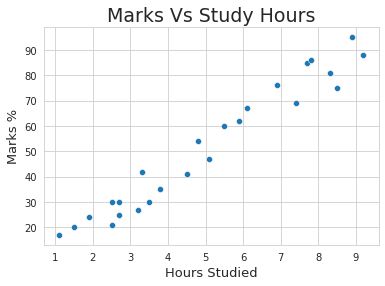

In [4]:
sns.set_style('whitegrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=19)
plt.ylabel('Marks %', size=13)
plt.xlabel('Hours Studied', size=13)
plt.show()

Plotting a regression line

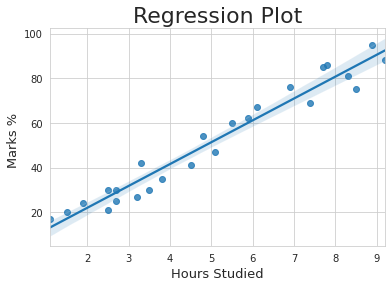

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [6]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=22)
plt.ylabel('Marks % ', size=13)
plt.xlabel('Hours Studied', size=13)
plt.show()
print(data.corr())

Training the Model

In [7]:
# Defining X and y 
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [8]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("..........Model Trained...........")

..........Model Trained...........


Model Trained

Predicting the Marks

In [9]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


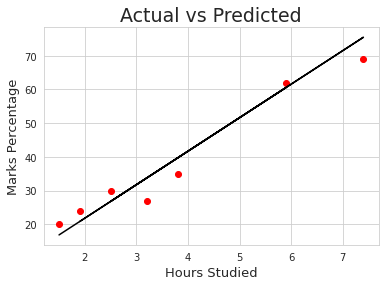

In [10]:
plt.scatter(x=val_X, y=val_y, color='red')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=19)
plt.ylabel('Marks Percentage', size=13)
plt.xlabel('Hours Studied', size=13)
plt.show()

Model Evaluvation

In [11]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


# <b>Small value of Mean absolute error depicts that the chances of error through the model are very less.
<b/>

## <b>The predicted score of a student if he/she studies for 9.25 hrs/ day will be:</b> 

In [12]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],2)))

Score = 93.89
